# WEEK 2 Notes

In this week, we will be discussing the following:

2. **[Weather data scraping using Excel](#Weather-Data-Scraping-using-EXCEL)**
2. **[BBC weather location API with Python](#BBC-Weather-location-API--with-Python)**
2. **[IMDb data using Python](#IMDb-Data-using-Python)**
2. **[Nominatim API with Python](#Nominatim-API-with-Python)**
2. **[Wikipedia Scraping with Python](#Wikipedia-Scraping-with-Python)**
2. **[Scraping PDFs with Tabula Python Library](#Scraping-PDFs-with-Tabula-Python-Library)**
2. **[Assignment Attempt](#ASSIGNMENT-ATTEMPT)**


**RESOURCES:**
- https://pymotw.com/3/re/index.html
- https://beautiful-soup-4.readthedocs.io/en/latest/#quick-start
- https://nominatim.org/release-docs/develop/api/Overview/
- https://wikipedia.readthedocs.io/en/latest/
- https://tabula-py.readthedocs.io/en/latest/tabula.html
***
***

# Weather Data Scraping using EXCEL


- Importing data from the web
- Data Tab **$\rightarrow$** Query

***
- Go to the webpage from where you need the data.
    - In our case, we take the data from [**HERE**](https://www.timeanddate.com/)
    - Search the city and go to the city page with the final data
    - There will be a tabular data in the webpage (That's what we'll be scraping using Excel)
- Copy the URL, go to Excel
- **DATA TAB -> NEW QUERY -> FROM OTHER SOURCES -> FROM WEB**


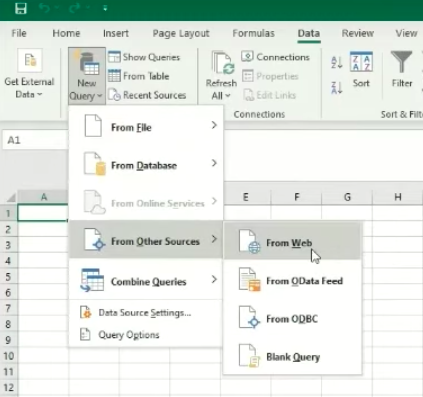


- Then, paste the URL and press okay
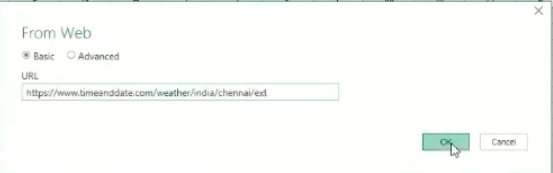

- The query editor or the navigator will be loaded
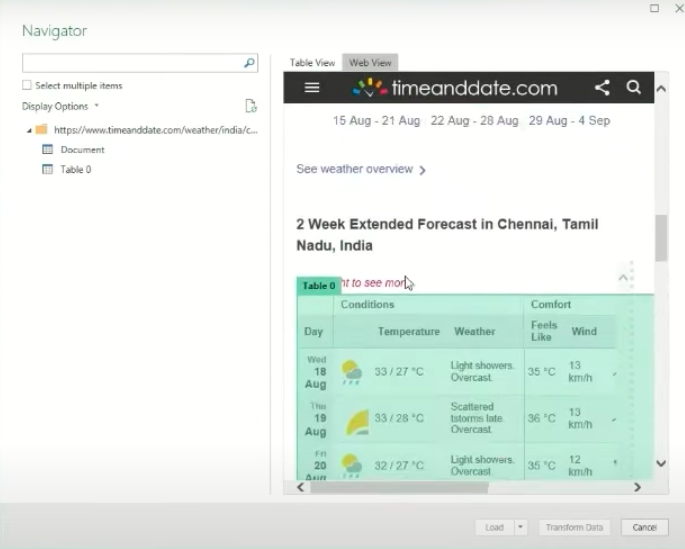


- Can load the data and then transform it or can first transform and then load it
***
***

# BBC Weather location API  with Python


In [20]:
import os

import requests               # to get the webpage // to make API calls
import json                   # to convert API to json format

from urllib.parse import urlencode # to take arguments and convert them to URL
import numpy as np
import pandas as pd
import re                     # regular expression operators

- When you search a location and check the network tab, you'll see a URL
- This URL is used to make an API call to get the location ID
- Let's manually make the API call and check the results

In [3]:
test_city = "New Delhi"
location_url = 'https://locator-service.api.bbci.co.uk/locations?' + urlencode({
   'api_key': 'AGbFAKx58hyjQScCXIYrxuEwJh2W2cmv', # Given by the URL itself
   's': test_city,
   'stack': 'aws',
   'locale': 'en',
   'filter': 'international',
   'place-types': 'settlement,airport,district',
   'order': 'importance',
   'a': 'true',
   'format': 'json'
})
location_url # Check how we gave key-value pairs and got the URL in the correct format, seperated by "&"

'https://locator-service.api.bbci.co.uk/locations?api_key=AGbFAKx58hyjQScCXIYrxuEwJh2W2cmv&s=New+Delhi&stack=aws&locale=en&filter=international&place-types=settlement%2Cairport%2Cdistrict&order=importance&a=true&format=json'

In [19]:
result = requests.get(location_url).json()

result

{'response': {'results': {'results': [{'id': '1261481',
     'name': 'New Delhi',
     'container': 'India',
     'containerId': 1269750,
     'language': 'en',
     'timezone': 'Asia/Kolkata',
     'country': 'IN',
     'latitude': 28.63576,
     'longitude': 77.22445,
     'placeType': 'settlement'}],
   'totalResults': 1}}}

In [11]:
print(f"Location ID for {test_city}: { result['response']['results']['results'][0]['id'] }")

Location ID for New Delhi: 1261481


## Scraping more data using BeautifulSoup4

In [22]:
# Let's now create a URL from where we get the actual data
url = 'https://www.bbc.com/weather/' + result['response']['results']['results'][0]['id']
url

'https://www.bbc.com/weather/1261481'

In [23]:
from bs4 import BeautifulSoup # to parse the webpage

resp = requests.get(url)

In [26]:
resp.content[:1000]

b'<!DOCTYPE html>\n<html lang="en" class="b-reith-sans-font b-pw-1280 no-touch wr-core wr-svg no-js" id="weather-forecast"\n      data-location-id="1261481" data-location-name="New%20Delhi"\n      data-wr-unit--temperature="c" data-wr-unit--windspeed="mph"\n>\n<head>\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta http-equiv="cleartype" content="on">\n    <link rel="dns-prefetch" href="https://ssl.bbc.co.uk/">\n    <link rel="dns-prefetch" href="http://sa.bbc.co.uk/">\n    <link rel="dns-prefetch" href="http://ichef-1.bbci.co.uk/">\n    <link rel="dns-prefetch" href="http://ichef.bbci.co.uk/">\n\n    <style>\n        [data-wr-unit--temperature="c"] .wr-c-map__temperature-f,\n        [data-wr-unit--temperature="f"] .wr-c-map__temperature-c,\n        [data-wr-unit--windspeed="mph"] .wr-c-map__wind-kph,\n        [data-wr-unit--windspeed="kph

In [27]:
soup = BeautifulSoup(resp.content, 'html.parser')

***
- **Now, we need to scrap these tags**

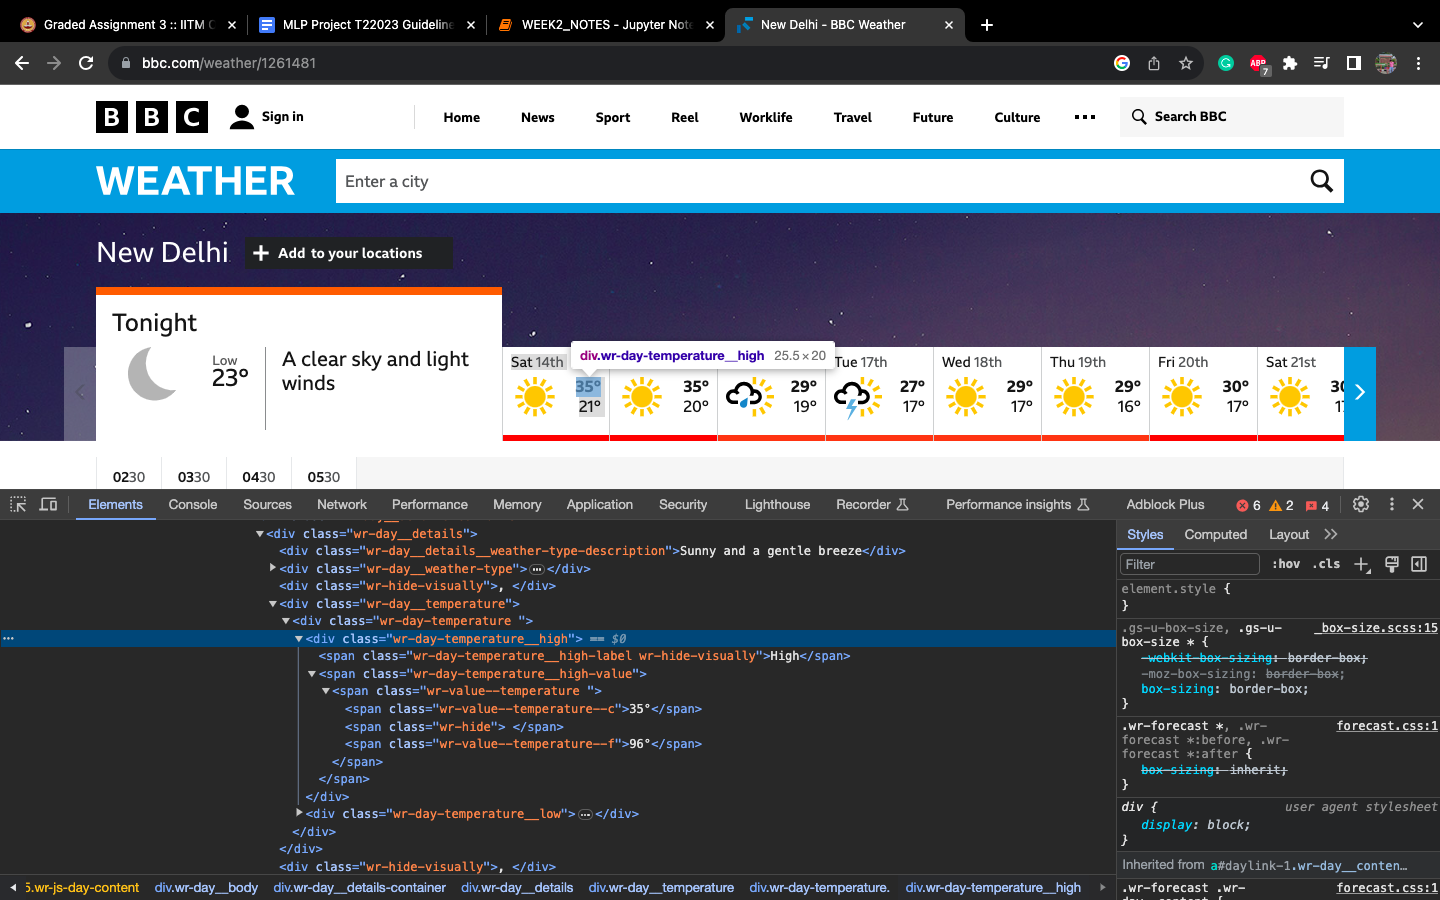

In [28]:
daily_high = soup.find_all("span", attrs={"class": "wr-day-temperature__high-value"})

daily_high

[<span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">35°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">96°</span></span></span>,
 <span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">35°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">95°</span></span></span>,
 <span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">28°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">83°</span></span></span>,
 <span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">27°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">80°</span></span></span>,
 <span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="w

In [30]:
daily_low = soup.find_all("span", attrs={"class": "wr-day-temperature__low-value"})
daily_low

[<span class="wr-day-temperature__low-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">23°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">74°</span></span></span>,
 <span class="wr-day-temperature__low-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">21°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">69°</span></span></span>,
 <span class="wr-day-temperature__low-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">20°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">68°</span></span></span>,
 <span class="wr-day-temperature__low-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">19°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">67°</span></span></span>,
 <span class="wr-day-temperature__low-value"><span class="wr-value--temperature"><span class="wr-val

In [35]:
print(daily_high[1])
print(daily_high[2])

<span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">35°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">95°</span></span></span>
<span class="wr-day-temperature__high-value"><span class="wr-value--temperature"><span class="wr-value--temperature--c">28°</span><span class="wr-hide"> </span><span class="wr-value--temperature--f">83°</span></span></span>


In [38]:
type(daily_high[1])

bs4.element.Tag

In [40]:
daily_high[1].text

'35° 95°'

In [44]:
daily_high[1].text.strip().split()

['35°', '95°']

In [45]:
daily_high[1].text.strip().split()[0]

'35°'

***
- **Now, what we did with one tag, we need to follow for all the tags**
***

In [47]:
for temp in daily_high:
    print(temp.text)

35° 96°
35° 95°
28° 83°
27° 80°
29° 83°
29° 84°
29° 85°
30° 86°
30° 87°
30° 86°
31° 87°
30° 87°
30° 86°


In [61]:
delhi_temp_high = [temp.text.strip().split()[0] for temp in daily_high]

In [62]:
print(delhi_temp_high)

['35°', '35°', '28°', '27°', '29°', '29°', '29°', '30°', '30°', '30°', '31°', '30°', '30°']


In [65]:
delhi_temp_low = [temp.text.strip().split()[0] for temp in daily_low]


In [66]:
print(delhi_temp_low)

['23°', '21°', '20°', '19°', '17°', '16°', '16°', '17°', '17°', '17°', '17°', '17°', '17°', '17°']


## Daily weather summary

In [67]:
daily_summary = soup.find('div', attrs={'class': 'wr-day-summary'})
daily_summary.text

'A clear sky and light windsSunny and a gentle breezeSunny and a gentle breezeLight rain and a gentle breezeThundery showers and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light windsSunny and light winds'

In [70]:
# RE: starts with a letter (lower or upper case), followed by any number of chars which are not upper-case.

daily_summary_list = re.findall("[a-zA-Z][^A-Z]*", daily_summary.text)
daily_summary_list

['A clear sky and light winds',
 'Sunny and a gentle breeze',
 'Sunny and a gentle breeze',
 'Light rain and a gentle breeze',
 'Thundery showers and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds',
 'Sunny and light winds']

# IMDb Data using Python

- Let's scrape some data from [TOP 250 MOVIES DATA](https://www.imdb.com/chart/top/)

In [132]:
header = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"}
r = requests.get("https://www.imdb.com/chart/top/", headers=header)

# Convert to a beautiful soup object
soup = BeautifulSoup(r.content)

# Print out HTML
contents = soup.prettify()
print(contents[:1000])



<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1697231706196);
        }
    })
  </script>
  <title>
   IMDb Top 250 Movies
  </title>
  <meta content="As rated by regular IMDb voters." data-id="main" name="description"/>
  <meta content="IMDb" property="og:site_name"/>
  <meta content="IMDb Top 250 Movies" property="og:title"/>
  

In [154]:
movie_title = [] # To store the movie titles
movie_year = [] # To store the duration of the movie

## Movie Titles

In [155]:
result = soup.find_all("h3", attrs={"class": "ipc-title__text"})
result[0].text

'IMDb Charts'

In [156]:
result[1].text.split(".")[1].strip()

'The Shawshank Redemption'

In [157]:
result[250].text.split(".")[1].strip()

'Dances with Wolves'

In [158]:
len(result)

263

In [159]:
for title in result[1:251]:
    movie_title.append(title.text.split(".")[1].strip())

In [160]:
len(movie_title)

250

In [161]:
print(movie_title[-1])

Dances with Wolves


## Movie Year

In [162]:
result = soup.find_all("span", attrs={"class": "cli-title-metadata-item"})
result

[<span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">1994</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">2h 22m</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">A</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">1972</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">2h 55m</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">A</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">2008</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">2h 32m</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">UA</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">1974</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">3h 22m</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">A</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">1957</span>,
 <span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">1h 36m</

In [163]:
result[229]

<span class="sc-c7e5f54-8 hgjcbi cli-title-metadata-item">2h 29m</span>

In [164]:
for year_index in range(0, len(result[:229]), 3):
    movie_year.append(result[year_index].text)

for year_index in range(len(result[:230]), len(result), 3):
    movie_year.append(result[year_index].text)

In [165]:
print(movie_year[0], movie_year[-1])

1994 1990


In [168]:
for year, title in zip(movie_year, movie_title):
    print(f"{title} was released in: {year}")

The Shawshank Redemption was released in: 1994
The Godfather was released in: 1972
The Dark Knight was released in: 2008
The Godfather: Part II was released in: 1974
12 Angry Men was released in: 1957
Schindler's List was released in: 1993
The Lord of the Rings: The Return of the King was released in: 2003
Pulp Fiction was released in: 1994
The Lord of the Rings: The Fellowship of the Ring was released in: 2001
Il Buono, Il Brutto, Il Cattivo was released in: 1966
Forrest Gump was released in: 1994
Fight Club was released in: 1999
The Lord of the Rings: The Two Towers was released in: 2002
Inception was released in: 2010
Star Wars: Episode V - The Empire Strikes Back was released in: 1980
The Matrix was released in: 1999
GoodFellas was released in: 1990
One Flew Over the Cuckoo's Nest was released in: 1975
Se7en was released in: 1995
It's a Wonderful Life was released in: 1946
Spider-man: Across the Spider-verse was released in: 2023
Shichinin No Samurai was released in: 1954
Interstel

# Nominatim API with Python

## Scraping using Geocoding API of Open Street Maps (OSM)

In [169]:
!pip install geopandas
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 664.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 535.9 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 256.0 kB/s eta 0:00:0000:0100:01


In [173]:
from geopy.geocoders import Nominatim

# Creating a locator object
locator = Nominatim(user_agent="Geocoder")

In [174]:
# Getting the location details
location = locator.geocode("New Delhi")

In [177]:
# Location information
location

Location(New Delhi District, Delhi, India, (28.6138954, 77.2090057, 0.0))

In [185]:
# Information in the location variable

print(location.address)
print(location.altitude)
print(location.latitude)
print(location.longitude)
print(location.point)
print("----------------------")
print("----------------------")
print("RAW INFORMATION STORED IN THE LOCATION VARIABLE")
print("----------------------")
print("----------------------")
print(location.raw) # A dictionary

New Delhi District, Delhi, India
0.0
28.6138954
77.2090057
28 36m 50.0234s N, 77 12m 32.4205s E
----------------------
----------------------
RAW INFORMATION STORED IN THE LOCATION VARIABLE
----------------------
----------------------
{'place_id': 210682786, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2763541, 'lat': '28.6138954', 'lon': '77.2090057', 'class': 'boundary', 'type': 'administrative', 'place_rank': 10, 'importance': 0.6748043445414906, 'addresstype': 'city', 'name': 'New Delhi District', 'display_name': 'New Delhi District, Delhi, India', 'boundingbox': ['28.4812209', '28.6456842', '77.0503708', '77.2551392']}


# Wikipedia Scraping with Python

In [186]:
!pip install wikipedia

In [188]:
import wikipedia as wk

***
- **Searching for webpages with a query out of all the webpages available**

In [195]:
wk.search("Data Science") # 10 results by default

['Data science',
 'Data',
 'Data (computer science)',
 'Data analysis',
 'Data type',
 'Master in Data Science',
 'Biomedical data science',
 'Big data',
 'Computer science',
 'Data structure']

In [196]:
wk.search("Data Science", results=5)

['Data science',
 'Data',
 'Data (computer science)',
 'Data analysis',
 'Data type']

***
- **Getting summary of a wikipedia page**

In [199]:
wk.summary("Data Science")

'Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured, and unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as 

In [202]:
wk.summary("Data Science", sentences=1)

'Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured, and unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine).'

***
- **Full page object ->**

In [205]:
full_page = wk.page("Data Science")

type(full_page)

wikipedia.wikipedia.WikipediaPage

In [211]:
# Accessing full page content
print(full_page.content)

Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured, and unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a

In [217]:
# Accessing full page URL
print(full_page.url)
print("------------")
print("------------")

# Accessing full page title
print(full_page.title)
print("------------")
print("------------")

# Accessing images on the full page
print(full_page.images)
print("------------")
print(full_page.images[0])
print("------------")
print("------------")



https://en.wikipedia.org/wiki/Data_science
------------
------------
Data science
------------
------------
['https://upload.wikimedia.org/wikipedia/commons/4/45/PIA23792-1600x1200%281%29.jpg', 'https://upload.wikimedia.org/wikipedia/commons/1/1c/Wiki_letter_w_cropped.svg']
------------
https://upload.wikimedia.org/wikipedia/commons/4/45/PIA23792-1600x1200%281%29.jpg
------------
------------


In [219]:
# Accessing the HTML of the full page
print(full_page.html())

<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">Interdisciplinary field of study on deriving knowledge and insights from data</div>
<style data-mw-deduplicate="TemplateStyles:r1033289096">.mw-parser-output .hatnote{font-style:italic}.mw-parser-output div.hatnote{padding-left:1.6em;margin-bottom:0.5em}.mw-parser-output .hatnote i{font-style:normal}.mw-parser-output .hatnote+link+.hatnote{margin-top:-0.5em}</style><div role="note" class="hatnote navigation-not-searchable">Not to be confused with <a href="/wiki/Information_science" title="Information science">information science</a>.</div>
<p class="mw-empty-elt">
</p>
<figure class="mw-default-size" typeof="mw:File/Thumb"><a href="/wiki/File:PIA23792-1600x1200(1).jpg" class="mw-file-description"><img src="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/PIA23792-1600x1200%281%29.jpg/220px-PIA23792-1600x1200%281%29.jpg" decoding="async" width="220" height="165" class

# Scraping PDFs with Tabula Python Library

In [247]:
!pip install tabula-py 


In [1]:
import tabula as tb

In [3]:
pdf_path = "/Users/PushpakRuhil/IIT-M_CODING/MAD_2/VIVA_L1/Final_Report_MAD2.pdf"

# tb.io.read_pdf(pdf_path, pages='4')


***
**Due to some error, tabula is not working. It will work on google-colab. Try there, maybe?**
***

# ASSIGNMENT ATTEMPT

In [3]:
!pip install beautifulsoup4

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("IFCB2009_85.xlsx")

In [7]:
df.shape

(591, 9)

In [14]:
df.groupby(df.CITY1).size().sort_values(ascending=False)

CITY1
CHENNAI        45
BANGALORE      23
COIMBATORE     21
MUMBAI         17
HYDERABAD      15
               ..
KARAIKUDI       1
KARAIKAL        1
KANJAMPATTY     1
KANGEYAM        1
YETHAPUR        1
Length: 364, dtype: int64

In [15]:
!pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00


In [21]:
from geopy.geocoders import Nominatim

city = 'Chennai'

locator = Nominatim(user_agent="measurements") 


In [22]:
location = locator.geocode('Delhi') 

In [23]:
location = locator.geocode(city) 
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))


Latitude = 13.0836939, Longitude = 80.270186


In [24]:
import requests

from bs4 import BeautifulSoup

from urllib.parse import urljoin

import os



url = 'https://www.premierleague.com/publications'

folder_location = r'./PDF_data'

if not os.path.exists(folder_location):

    os.mkdir(folder_location)


response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")     

 

for link in soup.select("a[href$='.pdf']"):

    filename = os.path.join(folder_location, link['href'].split('/')[-1])

    with open(filename, 'wb') as f:

        f.write(requests.get(urljoin(url,link['href'])).content)


In [31]:
!ls ./PDF_data/ | wc -l 


      47


In [35]:
import wikipedia as wk


In [36]:
wk.search("Delhi")

['Delhi',
 'New Delhi',
 'Delhi Gate, Delhi',
 'Delhi Sultanate',
 'Swaminarayan Akshardham (Delhi)',
 'Delhi University',
 'Delhi Crime',
 '2023 G20 New Delhi summit',
 'New Parliament House, New Delhi',
 'Delhi-6']

In [37]:
wk.search("Delhi", results=2)

['Delhi', 'New Delhi']

In [39]:
wk.summary("New Delhi")

"New Delhi ( , Hindi: [ˈnəiː ˈdɪlːiː], IAST: Naī Dillī) is the capital of India and a part of the National Capital Territory of Delhi (NCT). New Delhi is the seat of all three branches of the Government of India, hosting the Rashtrapati Bhavan, Sansad Bhavan, and the Supreme Court. New Delhi is a municipality within the NCT, administered by the NDMC, which covers mostly Lutyens' Delhi and a few adjacent areas. The municipal area is part of a larger administrative district, the New Delhi district.\nAlthough colloquially Delhi and New Delhi are used interchangeably to refer to the National Capital Territory of Delhi, both are distinct entities, with both the municipality and the New Delhi district forming a relatively small part of the megacity of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighbouring states, including Ghaziabad, Noida, Gurgaon and Faridabad.\nThe foundation stone of New Delhi was laid by George

In [53]:
temp_content = """

<!doctype html>

<html class="no-js" lang="">

    <head>

        <title>An e-commerce website</title>

    </head>

    <body>

        <h1 id='site_title'>Products</h1>

        <hr></hr>

        <div class="products">

            <h2><a href="product1.html">Phone</a></h2>

            <p>Technical Specifications of Phone</p>

        </div>

        <hr></hr>

        <div class="products">

            <h2><a href="product2.html">Camera</a></h2>

            <p>Technical Specifications of Camera</p>

        </div>

        <hr></hr>

        <div class='footer'>

            <p>Information about the Organization</p>

        </div>

    </body>

</html>

"""

In [54]:
from bs4 import BeautifulSoup as bs

r = requests.get("https://www.espn.in/football/scoreboard")

soup = bs(temp_content)

contents = soup.prettify()

In [59]:
phone = soup.find("div", class_="footer")

In [60]:
phone.p.text

'Information about the Organization'

In [66]:
place = 'Lincoln'
url = "https://locator-service.api.bbci.co.uk/locations?api_key=AGbFAKx58hyjQScCXIYrxuEwJh2W2cmv&stack=aws&locale=en&filter=international&place-types=settlement%2Cairport%2Cdistrict&order=importance&s={location}&a=true&format=json".format(location=place)

resp = requests.get(url).json()

In [68]:
# resp

In [70]:
search_query = 'Davie'

len(wk.search(search_query))

10

In [72]:
city = 'Santa Rosa'

locator = Nominatim(user_agent="measurements")

In [74]:
city_data = locator.geocode(city)

print(city_data.latitude)

38.4404925


In [75]:
city = "Monrovia"

city_data = locator.geocode(city)

print(city_data.longitude)

-10.797788
